In [431]:
import numpy as np
import pandas as pd

In [432]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [433]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [434]:
df.dropna(inplace=True)

In [435]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [436]:
df['family'] = df['SibSp'] + df['Parch']

In [437]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [438]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [439]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [440]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [441]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [442]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [443]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [444]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6443075117370892)

In [445]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [446]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [447]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [448]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [449]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [450]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.6206181533646322)

In [451]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_pred,y_test)
df.isna().sum()

Age         0
Fare        0
Survived    0
family      0
dtype: int64

In [452]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived','family'],axis=1),df['Survived'],train_size = 0.25,random_state = 0)
X_train

,Age,Fare
530,2.0,26.0000
172,1.0,11.1333
263,40.0,0.0000
754,48.0,65.0000
751,6.0,12.4750
...,...,...
883,28.0,10.5000
238,19.0,10.5000
789,46.0,79.2000
704,26.0,7.8542


In [453]:
trf = ColumnTransformer(
    [('x_trf_age_uniform',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform'),[0]), 
    ('x_trf_age_quantile',KBinsDiscretizer(n_bins=10,encode='ordinal',quantile_method='linear'),[0]),
    ('x_trf_fare_quantile',KBinsDiscretizer(n_bins=10,encode='ordinal',quantile_method='linear'),[1]),
    ('x_trf_fare_uniform',KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform'),[1]),
    ],remainder='passthrough')

x_train_trf = trf.fit_transform(X_train)


In [454]:
x_train_trf.shape



(178, 4)

In [456]:
df_trf = pd.DataFrame({'age_train':X_train['Age'].values,
    'fare_train':X_train['Fare'].values,             
    'x_trf_age_uniform':x_train_trf[:,0], 
    'x_trf_age_quantile':x_train_trf[:,1],
    'x_trf_fare_uniform':x_train_trf[:,3],
    'x_trf_fare_quantile':x_train_trf[:,2]
    })

In [457]:
df_trf

,age_train,fare_train,x_trf_age_uniform,x_trf_age_quantile,x_trf_fare_uniform,x_trf_fare_quantile
0,2.0,26.0000,0.0,0.0,0.0,6.0
1,1.0,11.1333,0.0,0.0,0.0,3.0
2,40.0,0.0000,5.0,7.0,0.0,0.0
3,48.0,65.0000,6.0,8.0,1.0,8.0
4,6.0,12.4750,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...
173,28.0,10.5000,3.0,5.0,0.0,3.0
174,19.0,10.5000,2.0,2.0,0.0,3.0
175,46.0,79.2000,6.0,8.0,1.0,8.0
176,26.0,7.8542,3.0,4.0,0.0,1.0


<Axes: xlabel='x_trf_fare_quantile', ylabel='Count'>

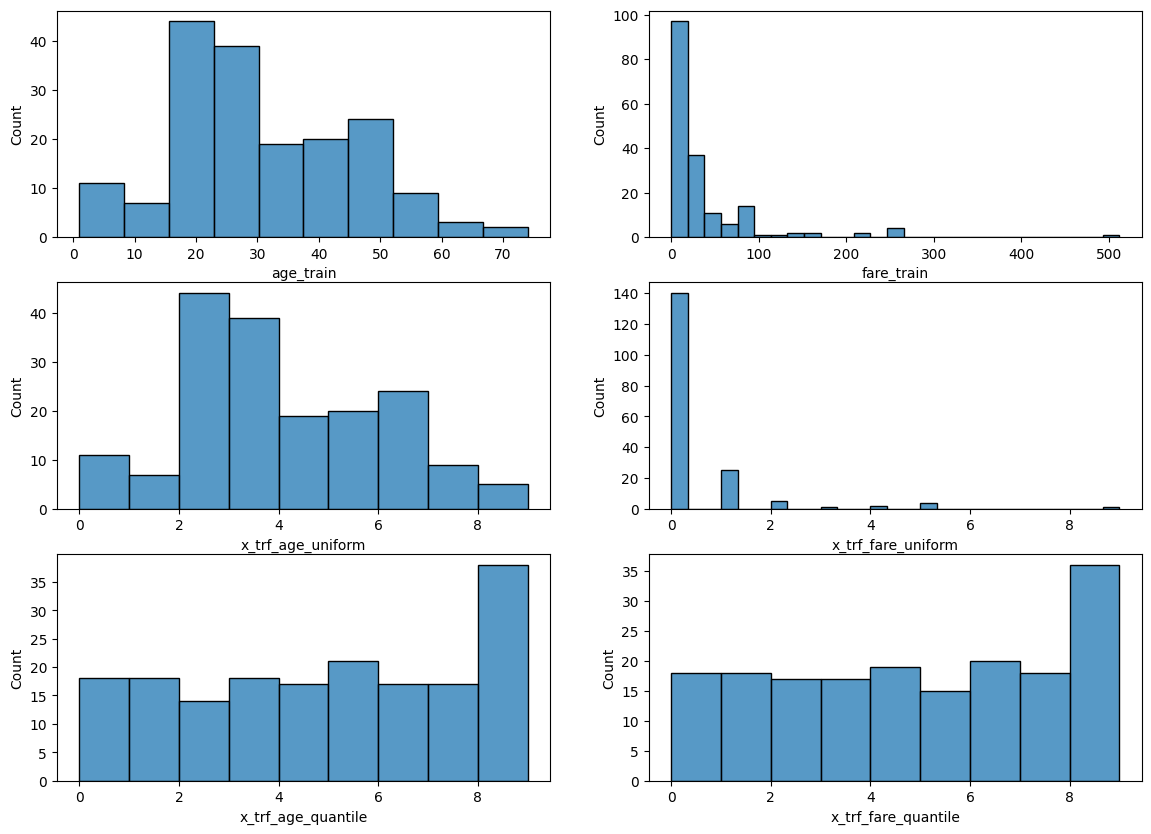

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(14,10))
sns.histplot(df_trf["age_train"],ax=axes[0,0])
sns.histplot(df_trf["fare_train"],ax = axes[0,1])
sns.histplot(df_trf["x_trf_age_uniform"],ax=axes[1,0])
sns.histplot(df_trf["x_trf_age_quantile"],ax=axes[2,0])
sns.histplot(df_trf["x_trf_fare_uniform"],ax=axes[1,1])
sns.histplot(df_trf["x_trf_fare_quantile"],ax=axes[2,1])
